# Sample Size Experiment using Random Forest and Deep Networks

### Random Forest (RF) vs. Deep Networks (DN)

Random forest is inherently a non-parametric model, meaning that the algorithm requires no assumptions about the data distribution. With infinitely many trees and n &rarr; $\infty$, RF will follow non-parametric behavior and will guarantee convergence.

Deep Networks with a fixed architecture are entirely parametric. As presented by [Vogelstein, et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.04.29.068460v1), there is a visible bias variance tradeoff between DNs of varying complexity. This is evident by testing each model over a range of sample sizes. At a large enough sample size, a RF model will surpass any parametric DN.

The goal of this tutorial is to identify a joint distribution (X,Y) that demonstrates this relationship. RF should profuce a smaller generalization error as small sample sizes, a specific parametric DN should produce a smaller generalization error at medium sample sizes, and RF should once again produce a smaller generalization error at large sample sizes.

### Import necessary packages and modules

In [1]:
from functions.sample_size_functions import *

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Sparse Parity Distribution

The joint distribution used to demonstrate RF convergence is sparse parity. Sparse parity is a _p_-dimensional binary classification problem that generalizes the noisy XOR distribution. 

Data is generated from a _p_-dimensional feature vector, where each _X_<sub>1</sub>, ... , _X_<sub>p</sub> ~ i.i.d.  _U_(-1,1). A parameter _p_* represents the number of informative dimensions, where _p_* < _p_. Class label _Y_ = 0 if there are an even number of positive values among the first _p_* < _p_ dimensions, and _Y_ = 1 if not.

Mathematically, we can let _Q_ = $\sum_{j=1}^{p*}$I ( X<sub>j</sub> > 0 ) where _p_* < _p_. The function I ( _X_<sub>j</sub> > 0 ) represents the indicator that the feature at position _j_ is greater than 0. Class label _Y_ returns 1 if _Q_ is odd, and 0 if _Q_ is even.

In [2]:
X, y = sparse_parity(num_samples=500, p=5, p_star=2)

### Visualize Sparse Parity

Plot the first and second dimensions of the sparse parity distribution. For this plot, `p` = 5 and `p_star` = 2. With only 2 informative dimensions, this plot is equivalent to that of the noisy XOR distribution.

Text(0.5, 1.0, 'sparse parity: p=5, p*=2')

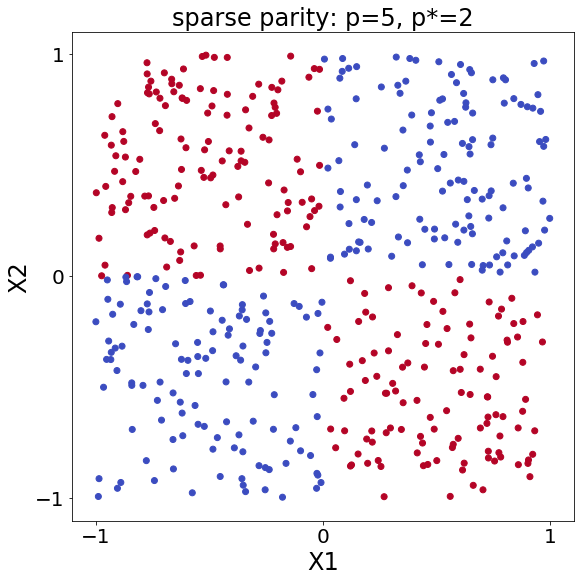

In [3]:
fig = plt.figure(figsize=(9, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")

plt.ylabel("X2", fontsize=24)
plt.xlabel("X1", fontsize=24)
plt.yticks([-1, 0, 1], fontsize=20)
plt.xticks([-1, 0, 1], fontsize=20)
plt.title("sparse parity: p=5, p*=2", fontsize=24)

### Define Experiment Parameters and Model Hyperparameters

#### The cell below defines the sparse parity distribution parameters:

`p`: The number of total dimensions in the sparse parity distribution

`p_star`: The number of informative dimensions in the sparse parity distribution

In [4]:
# Sparse parity parameters
p = 14
p_star = 3

#### The cell below defines the RF and DF hyperparameters:

`num_trees`: The number of trees in the RF model

`max_depth`: Max depth of the RF model

`rf_verbose`: The printed output of the RF model

`hidden_nodes`: The number of nodes in the hidden layer of the DN

`batch_size`: The batch size of the DN

`dnn_verbose`: The printed output of the DN model

In [5]:
# RF hyperparameters
num_trees = 500
max_depth = None
rf_verbose = 0

# DN hyperparameters
hidden_nodes = 4
batch_size = 3
dn_verbose = 0

#### The cell below defines experiment parameters:

`training_sample_sizes`: A list of training set sample sizes to iterate over while training the model

`testing_sample_size`: An integer designating the size of the test set

`trials`: Number of trials to run the experiment

In [6]:
# Experiment parameters
training_sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12000,
    14000,
    17000,
    20000,
]
testing_sample_size = 8000
trials = 5

### Run the Testing Suite

The testing suite trains RF and DN models across all sample sizes and averages accuracies across trials

In [7]:
rf_evolution, dn_evolution = test_suite(
    training_sample_sizes=training_sample_sizes,
    testing_sample_size=testing_sample_size,
    trials=trials,
    p=p,
    p_star=p_star,
    num_trees=num_trees,
    max_depth=None,
    rf_verbose=rf_verbose,
    hidden_nodes=hidden_nodes,
    batch_size=batch_size,
    dn_verbose=dn_verbose,
)

### Plot and Visualize the Results

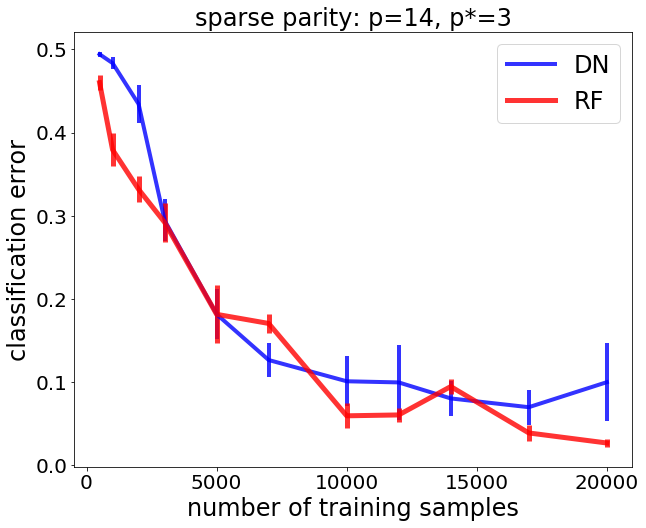

In [8]:
plot_sample_size_experiment(rf_evolution, dn_evolution, training_sample_sizes, 14, 3)

### Load the Stored Model (Trained with 100 Trials)

Increasing the number of trials improves the smoothness of the output, but takes additional time to run. The below cell loads in a model trained with 100 trials.

In [9]:
%store -r rf_evolution_100_trials
%store -r dn_evolution_100_trials

### Plot and Visualize the Results of 100 Trial Output

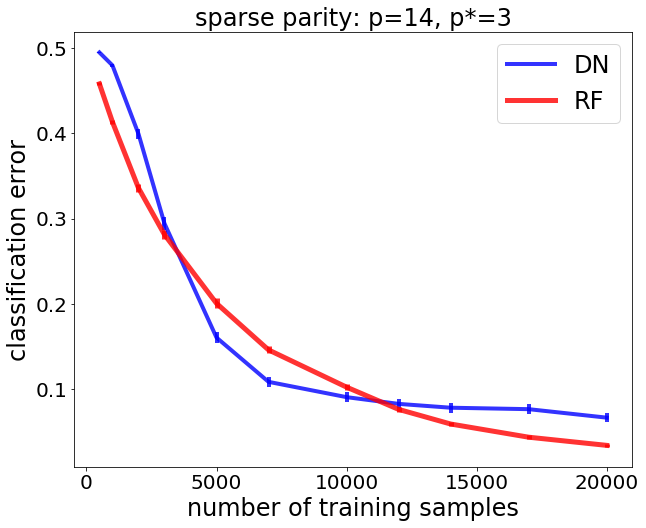

In [10]:
plot_sample_size_experiment(
    rf_evolution_100_trials, dn_evolution_100_trials, training_sample_sizes, 14, 3
)